<a href="https://colab.research.google.com/github/SophyJi/MDST-projects/blob/main/%E2%80%9CFinal_of_skml_data_cleaning_ipynb%E2%80%9D(linxuanj).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Cleaning

In [ ]:
!ls drive/MyDrive/"MDST 2022-2023"
!unzip drive/MyDrive/"MDST 2022-2023"/train .
!unzip -q train.zip

 data_filenames.txt  'First of skml_data_cleaning.ipynb'   train
'dogs vs cats'	      __MACOSX				   train.zip
Archive:  drive/MyDrive/MDST 2022-2023/train.zip
caution: filename not matched:  .
unzip:  cannot find or open train.zip, train.zip.zip or train.zip.ZIP.


In [ ]:
!cd drive/MyDrive/"MDST 2022-2023"/"train.zip"  && ls && unzip train.zip

/bin/bash: line 0: cd: drive/MyDrive/MDST 2022-2023/train.zip: Not a directory


In [ ]:
!ls train > data_filenames.txt

ls: cannot access 'train': No such file or directory


In [ ]:
!cat data_filenames.txt | tail -n 10

1. Load every single image as a 2D grayscale array
2. Figure out the corresponding label for each image

In [ ]:
import cv2

In [ ]:
image = cv2.imread('train/dog.1027.jpg')
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grayscale_image

error: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(grayscale_image, cmap="gray")

In [ ]:
def load_image_training_pair(filename):
    # input: the filename for the image
    # output: (array, label (1 - dog, 0 - cat))
    image = cv2.imread("train/" + filename, cv2.IMREAD_GRAYSCALE) / 255
    resized_image = cv2.resize(image, (80,80), cv2.INTER_LANCZOS4)
    if filename[0] == "d":
        label = 1
    else:
        label = 0
    return resized_image, label

In [ ]:
import tqdm

images = []
labels = []

with open("data_filenames.txt", "r") as ifstream:
    for index, filename in tqdm.tqdm(enumerate(ifstream.readlines())):
        image, label = load_image_training_pair(filename.strip())
        images.append(image)
        labels.append(label)

In [ ]:
test_images = images[0:2500] + images[12500:15000]
test_labels = labels[0:2500] + labels[12500:15000]

train_images = images[2500:12500] + images[15000:25000]
train_labels = labels[2500:12500] + labels[15000:25000]

In [ ]:
import numpy as np
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)


# Model Definition

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
model = models.Sequential(name="dvc3000")
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [ ]:
model.summary()

Model: "dvc3000"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_112 (Conv2D)         (None, 78, 78, 32)        320       
                                                                 
 max_pooling2d_94 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_113 (Conv2D)         (None, 37, 37, 256)       73984     
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, 18, 18, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_114 (Conv2D)         (None, 16, 16, 128)       295040    
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 8, 8, 128)        0   

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
625/625 [==============================] - 11s 17ms/step - loss: 0.6905 - accuracy: 0.5213 - val_loss: 0.6818 - val_accuracy: 0.5492
Epoch 2/10
625/625 [==============================] - 10s 17ms/step - loss: 0.6828 - accuracy: 0.5594 - val_loss: 0.6713 - val_accuracy: 0.5896
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 0.6468 - accuracy: 0.6314 - val_loss: 0.5999 - val_accuracy: 0.6908
Epoch 4/10
625/625 [==============================] - 10s 17ms/step - loss: 0.5748 - accuracy: 0.7042 - val_loss: 0.5022 - val_accuracy: 0.7606
Epoch 5/10
625/625 [==============================] - 10s 16ms/step - loss: 0.4804 - accuracy: 0.7765 - val_loss: 0.4537 - val_accuracy: 0.7892
Epoch 6/10
625/625 [==============================] - 10s 17ms/step - loss: 0.4058 - accuracy: 0.8212 - val_loss: 0.4143 - val_accuracy: 0.8182
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 0.3611 - accuracy: 0.8441 - val_loss: 0.3792 - val_accuracy:

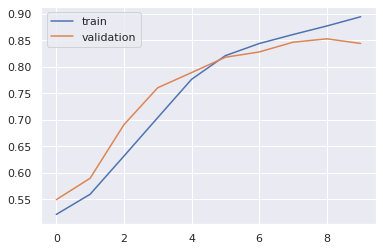

In [ ]:
import seaborn as sns
sns.set_theme()
plt.plot(np.arange(0, len(history.history['accuracy'])), history.history['accuracy'], label="train")
plt.plot(np.arange(0, len(history.history['val_accuracy'])), history.history['val_accuracy'], label="validation")
plt.legend()

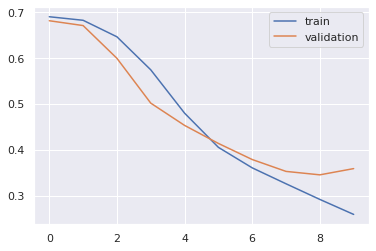

In [ ]:
plt.plot(np.arange(0, len(history.history['loss'])), history.history['loss'], label="train")
plt.plot(np.arange(0, len(history.history['val_loss'])), history.history['val_loss'], label="validation")
plt.legend()